# AOS 51, Spring 2018, Lab #7

# Matplotlib pt 2

Last week, we learned how to create simple Matplotlib plots using the `plt.plot()` (and similar) function. 

This week, we'll take a deeper dive into Matplotlib and better understand how to create and customize figures. 

Much of this material is adapted from notes on [Matplotlib's GitHub repository](https://github.com/matplotlib/AnatomyOfMatplotlib).

---

Import matplotlib, numpy, and pandas for this lab!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

---
# Terminology 

Let's view [this Jupyer Notebook](https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb) to visualuze how Matplotlib defines three terms:

1. Figure
2. Axes/subplot
3. Y-axis and X-axis 

We see that:

1. The "Figure" is the highest-level container of the plot. It encapsulates the entire page where stuff is drawn. 

2. "Axes" are the area that we plot data on, along with any ticks/labels/etc associated with it. An Axes is created with a call to `subplot`, so Axes and Subplot are mostly synonymous terms now. 

3. Each Axes has an "XAxis" and a "YAxis". These contain the ticks, tick locations, labels, etc.
---

# Creating a Figure

In [3]:
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

Nothing is shown...because it's just a blank figure for now with 0 Axes of data! 

We need to add an axes using `ax = fig.add_subplot(1,1,1)`.

We'll understand what (1,1,1) means shortly. 

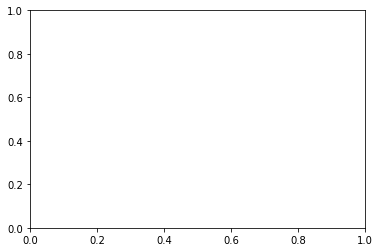

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.show()

# "Setting" things on the Axes

In the last lab, we could plot something like:

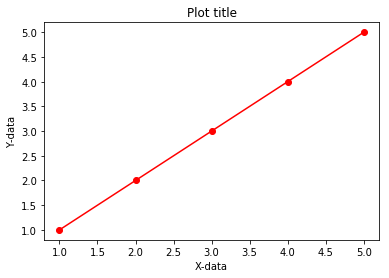

In [5]:
plt.plot([1,2,3,4,5], [1,2,3,4,5], color='red', marker='o')
plt.xlabel('X-data')
plt.ylabel('Y-data')
plt.title('Plot title')
plt.show()

When working with figures and Axes, we'll be using a slightly different syntax - one that "sets" things on the plot.

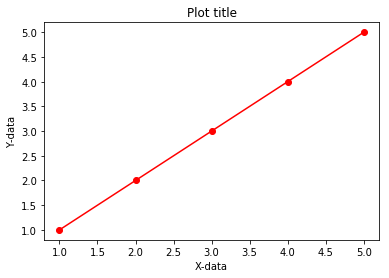

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([1,2,3,4,5], [1,2,3,4,5], color='red', marker='o') #same as above, but plotting on the Axes ("Ax")
ax.set_xlabel('X-data') # setting the xlabel on the Axes
ax.set_ylabel('Y-data') # setting the ylabel on the Axes
ax.set_title('Plot title') # setting the title on the Axes
plt.show()

# What does that (1,1,1) mean?

Figures are defined according to three pieces of information:

1. Number of rows in the entire figure
2. Numer of columns in the entire figure
3. Current subplot number (starts with 1 this time!)

So, (1,1,1) means that we're creating a figure with 1 row, 1 column, and the current axes (e.g. `ax = fig.add_subplot()` is subplot number 1. 

We'll play around with these numbers shortly to better understand them. 

---
**In-class exercise**

Using the figure/axes syntax, create an appropriate plot displaying the last 24 hours of LAX windspeeds (mph):

In [7]:
windspeed = [4.6, 4.8, 4.5, 4.0, 5.6, 6.0, 6.1, 6.2, 6.0, 5.3, 5.3, 5.3, 
             7.1, 6.0, 5.5, 5.4, 6.2, 5.0, 4.8, 4.5, 4.2, 4.0, 3.5, 3.4]

---
# So, why not just use the simpler syntax?

For easy, single plots, the simple syntax usually is sufficient. 

But for more complicated plots, **especially multi-panel plots**, explicitly working with Axes/Figures will lead to more accurate and concise code. 

# Multi-panel plots

Multi-panel plots are regularly used in climate data anlyses. They can be created easily using the Axes/Figure matplotlib notation.

Let's begin with an example of a 2-panel plot:

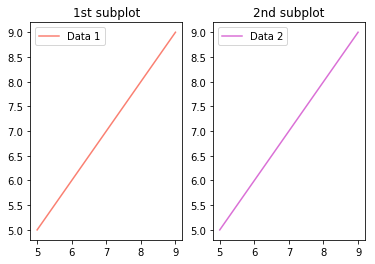

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1) # 1 row, 2 columns, 1st subplot
ax1.plot(np.arange(5,10), np.arange(5,10), color='salmon', label='Data 1')
ax1.set_title('1st subplot')
ax1.legend()

ax2 = fig.add_subplot(1,2,2) # 1 row, 2 columns, 2nd subplot
ax2.plot(np.arange(5,10), np.arange(5,10), color='orchid', label='Data 2')
ax2.set_title('2nd subplot')
ax2.legend()

plt.show()

Let's break this down:

1. Initialize the figure (`fig = plt.figure()`)

2. Initialize the 1st subplot within a 1 x 2 total plot and call it Axes1 ("ax1") (`ax1 = fig.add_subplot(1,2,1)`)

3. Create the plot for ax1 (`ax1.plot(...)`)

4. Initialize the 2nd subplot within a 1 x 2 total plot and call it Axes2 (ax2") (`ax2 = fig.add_subplot(1,2,2)`)

5. Create the plot for ax2 (`ax2.plot(...)`)

6. Dislay the total plot (`plt.show()`)

---
**In-class exercise**

Here is a dataframe storing midnight-11pm hourly temperatures (F), dew point (F), and relative humidty (%) at LAX for May 14, 2018.

In [9]:
df = pd.DataFrame()
df['Temp'] = [57.9, 57.0, 57.0, 57.0, 55.0, 55.4, 55.9, 55.0, 57.2, 64.4, 66.2, 69.8, 71.6, 71.6,
             73.4, 73.4, 71.6, 68.0, 66.2, 62.6, 62.6, 62.6, 60.8, 55.4]
df['DewPt'] = [15.1, 10.9, 12.0, 9.0, 9.0, 8.6, 8.1, 10.0, 10.4, 6.8, 10.4, 3.2, 3.2, 3.2, 1.4,
              3.2, 3.2, 3.2, 1.4, 3.2, 10.4, 10.4, 10.4, 12.2]
df['RH'] = [19, 16, 17, 15, 16, 15, 15, 17, 16, 10, 11, 7, 7, 7, 6, 6, 7, 8, 8, 9, 13, 13, 14, 18]
df

,Temp,DewPt,RH
0,57.9,15.1,19
1,57.0,10.9,16
2,57.0,12.0,17
3,57.0,9.0,15
4,55.0,9.0,16
5,55.4,8.6,15
6,55.9,8.1,15
7,55.0,10.0,17
8,57.2,10.4,16
9,64.4,6.8,10


Create a 1 x 3 figure:

* Subplot 1: Histogram of hourly temperatures
* Subplot 2: Time series of hourly dew points
* Subplot 3: Bar chart of RH 

Note: the layout will not look good initially! We'll fix it in the next section. 

---
# Figure size and layout 

You can specify the figure size ("figsize") when initializing the figure:

`fig = plt.figure(figsize=(W, H))`

where W = width in inches, H = height in inches. 

You can also [adjust the subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) with spacing on the top, bottom, left, right, width space between plots, and height space between plots:

`fig.subplots_adjust(left=[value], bottom=[value], right=[value], top=[value], wspace=[value], hspace=[value])`

where [value] is replaced with numbers, which are not entirely intuitive and require some guess and check! Read the hyperlink above to see the default values, then tweak them from there.

---
**In-class exercise** 

Change the figure size and adjust the subplots to improve the layout of the 3-panel figure you created above. 

---

# Ticks, Tick Labels, and Axis Limits

So far, we've let matplotlib figure out the best tick spacing and labels for our plots, but they are highly customizable.

** Setting x-ticks and y-ticks**

We can manually set the [x-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) and [y-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html) using:

`ax.set_xticks([list or 1D array of tick locations])`

`ax.set_yticks([list or 1D array of tick locations])`

** Setting x-ticklabels and y-ticklabels **

We can set the [x-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) and [y-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html) using:

`ax.set_xticklabels([string of tick labels])`

`ax.set_yticklabels([string of tick labels])`

** Setting the x-axis limits and y-axis limits **

We can set the [x-axis limits](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html) and [y-axis limits](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html) using:

`ax.set_xlim([start], [end])`

`ax.set_ylim([start], [end])`

Let's demonstrate with LA's monthly average temperatures:

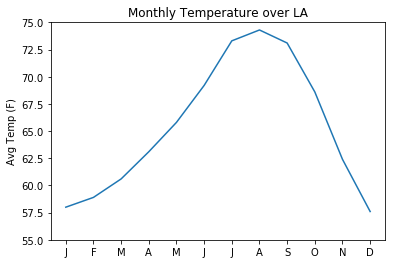

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(0,12), [58.0, 58.9, 60.6, 63.1, 65.8, 69.2, 73.3, 74.3, 73.1, 68.6, 62.4, 57.6])
ax.set_ylabel('Avg Temp (F)')
ax.set_title('Monthly Temperature over LA')

# Set 12 ticks along the x-axis
ax.set_xticks(np.arange(12))

# Set the x-tick labels from numbers to calendar month letters
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# Set the y-limit to be 55 to 75
ax.set_ylim(55,75)

plt.show()

# Horizontal and Vertical Lines

One more thing to learn today:

Including horizontal and vertical lines in graphs can denote, for instance, an average value across a time series (usually a horizontal line) or to highlight certain years (usually a vertical line). 

Drawing [horizontal](https://matplotlib.org/2.0.2/api/_as_gen/matplotlib.axes.Axes.axhline.html) and [vertical lines](https://matplotlib.org/2.0.2/api/_as_gen/matplotlib.axes.Axes.axvline.html) can be accomplished with:

`ax.axhline(y=[location on y-axis])`

`ax.axvline(x=[location on x=axis])`

Example:

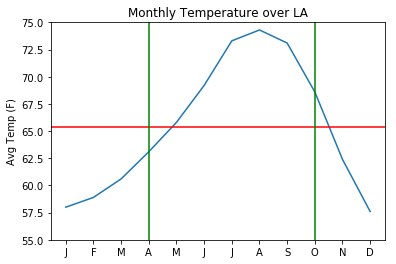

In [9]:
la_monthly_temp = [58.0, 58.9, 60.6, 63.1, 65.8, 69.2, 73.3, 74.3, 73.1, 68.6, 62.4, 57.6]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(0,12), la_monthly_temp)
ax.set_ylabel('Avg Temp (F)')
ax.set_title('Monthly Temperature over LA')

# Set 12 ticks along the x-axis
ax.set_xticks(np.arange(12))

# Set the x-tick labels from numbers to calendar month letters
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# Set the y-limit to be 55 to 75
ax.set_ylim(55,75)

# Add a horizontal line showing the annual-mean 
annual_mean = np.mean(la_monthly_temp)
ax.axhline(y=annual_mean, color='red')

# Add vertical lines to denote the start and end of the dry-season (April and October)
ax.axvline(x=3, color='green')
ax.axvline(x=9, color='green')

plt.show()

---
** In-class exercise **

Below is a list of 1950-2099 April snow water equivalent (SWE, unit:inches) across the Northern Sierra Nevada. 

* 1950-2005 data are observed values.

* 2006-2099 data are projected by a climate model. 

Create a high-quality 1x3 3-panel figure displaying the following:

* Panel 1: 1950-2005 time series of observed SWE, along with a horizontal line showing the 1959-2005 average 

* Panel 2: 2006-2099 time series of projected SWE with the same y-limits as Panel 1, along with a horizontal line showing the 2006-2099 average

* Panel 3: Bar chart of four data points:

   1. 1950-2005 average SWE with "historical" as the x-tick label
   2. 2006-2035 average SWE with "near-century" as the x-tick label
   3. 2036-2065 average SWE with "mid-century" as the x-tick label
   4. 2066-2099 average SWE with "late-century" as the x-tick label 
   
   Note: we can add another keyword argument of "rotation=90" when setting ticklabels to rotate the text to fit. 

In [35]:
SWE = [8.5, 4.1, 23.7, 7.6, 4.7, 6.5, 13.9, 3.8, 16.2, 1.7, 3.8, 3.3, 9.0, 4.6, 4.6, 10.4, 3.4, 17.6, 5.3, 20.8, 
       5.9, 10.5, 4.0, 13.0, 11.9, 14.2, 1.2, 0.3, 11.0, 7.4, 10.1, 3.3, 15.0, 20.2, 8.6, 4.5, 7.0, 1.9, 1.0, 5.5, 
       1.3, 5.2, 2.2, 17.0, 1.7, 18.2, 8.1, 6.0, 16.2, 12.9, 5.0, 2.6, 5.2, 5.3, 2.6, 8.0, 4.5, 6.4, 6.8, 3.4, 3.6, 
       4.1, 2.4, 8.6, 13.0, 14.0, 3.4, 0.7, 4.1, 0.9, 0.6, 7.5, 7.7, 6.4, 10.0, 1.3, 10.9, 3.3, 1.2, 6.3, 10.2, 7.4,
       4.8, 3.9, 4.5, 2.6, 3.1, 5.1, 0.7, 3.3, 9.6, 2.8, 2.8, 4.7, 0.5, 3.6, 1.6, 4.7, 5.2, 2.7, 2.0, 3.4, 4.6, 0.5,
       3.3, 0.1, 1.3, 0.1, 1.0, 1.7, 4.9, 3.5, 0.4, 0.9, 1.9, 1.5, 6.9, 1.9, 4.9, 0.2, 1.7, 4.2, 1.1, 2.1, 4.0, 0.2,
       3.1, 4.6, 0.5, 2.0, 9.2, 0.6, 0.6, 2.3, 2.9, 1.1, 0.9, 0.8, 1.2, 0.5, 0.2, 0.8, 0.5, 0.4, 0.2, 1.7, 0.0, 0.4,
       0.7, 1.3]